In [1]:
import sklearn
import pandas as pd
import matplotlib
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#prepare the class labels. Iris setosa will be labelled as -1, Iris versicolor as 1
X = df.iloc[0:100, 4].values
y= np.where(X=="Iris-setosa", -1, 1)

In [4]:
#prepare the training data
data = df.iloc[0:100, [0,2]].values

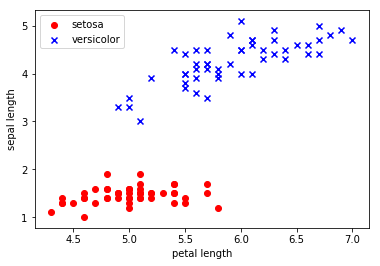

In [5]:
plt.scatter(data[:50, 0], data[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(data[50:100, 0], data[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [6]:
def plot_decision_regions(data, y, classifier, resolution=0.02):
    """
    A function that plots decision regions based on "Implementing a perceptron algorithm in Python by Raschka et al.
    """
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #meshgrid
    x1min, x1max = data[:,0].min()-1, data[:, 0].max()+1
    x2min, x2max = data[:,1].min()-1, data[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, resolution), np.arange(x2min, x2max, resolution))
    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=data[y==cl,0], y=data[y==cl, 1], 
                   alpha=0.8, c=cmap(idx), 
                   marker=markers[idx], label=cl)
    plt.scatter(x=[6.0], y=[1.8], 
               alpha=0.8, marker='v', c='cyan')


In [7]:
from sklearn import svm

clf = svm.LinearSVC()
clf.fit(data, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

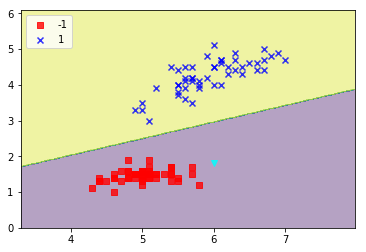

In [8]:
plot_decision_regions(data, y, clf)
plt.legend(loc='upper left')
plt.show()

In [9]:
def add_attack_point(data, y, attack_points, attack_class=1):
    """
    Add a new attack point to the dataset
    
    Returns:
    --------
    
    New dataset including attack point
    
    New class label vector including label for attacking class (1 in this case)
    """
    return np.concatenate((data, attack_points)), np.concatenate((y, np.array(len(attack_points)*[attack_class])))

def retrain_and_plot(clf, new_data, new_y):
    """
    Retrain the classifier with new data and plot the result
    """
    clf.fit(new_data, new_y)
    plot_decision_regions(new_data, new_y, clf)
    plt.legend(loc='upper left')
    plt.show()


In [10]:
new_data, new_labels = add_attack_point(data, y, [[6.0, 2.0]])

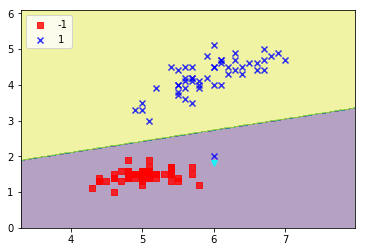

In [15]:
retrain_and_plot(clf, new_data, new_labels)

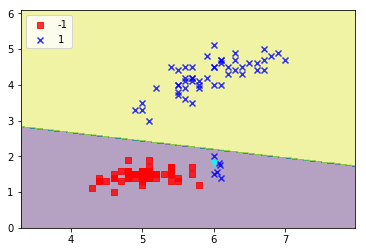

In [12]:
x1_new = [6.0, 6.1, 6.05, 6.08, 6.09]
x2_new = [1.5, 1.4, 1.55, 1.8, 1.75]
new_vals = map(list, zip(x1_new, x2_new))
new_data_2, new_labels_2 = add_attack_point(new_data, new_labels, new_vals)
retrain_and_plot(clf, new_data_2, new_labels_2)

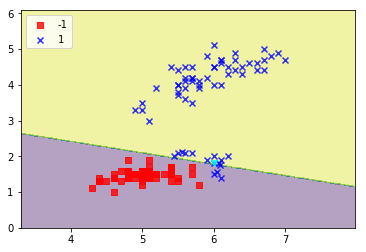

In [13]:
x1_new = [5.5, 5.6, 5.559, 5.7, 5.45, 6.0, 6.1, 6.2, 5.9]
x2_new = [2.1, 2.105, 2.110, 2.089, 2.0, 1.8, 1.9, 2.0, 1.9]
new_vals = map(list, zip(x1_new, x2_new))
new_data_3, new_labels_3 = add_attack_point(new_data_2, new_labels_2, new_vals)
retrain_and_plot(clf, new_data_3, new_labels_3)

In [14]:
rogue_point = [[6.0, 1.8]]
clf.predict(rogue_point)

array([1])